# Permasalahan

Membangun model machine learning yang bisa memprediksi seseorang terklasifikasi diabetes atau tidak diabetes

# Import Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Load and Inspect Data

In [2]:
diabetes_df = pd.read_csv("./dataset/diabetes.csv")

## Melihat dimensi data

In [3]:
diabetes_df.shape

(768, 9)

## Mengetahui sekilas data

In [4]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Rename Columns

In [6]:
diabetes_df.rename(
    columns={
        'Pregnancies': 'num_preg',
        'Glucose':'glucose',
        'BloodPressure':'diastolic_bp',
        'SkinThickness': 'skin_thickness',
        'Insulin':'insulin',
        'BMI':'bmi',
        'DiabetesPedigreeFunction':'diabetes_pred',
        'Age':'age',
        'Outcome':'target'
    },
    inplace=True
)

## Mengecek missing values

In [7]:
diabetes_df.isnull().sum()

num_preg          0
glucose           0
diastolic_bp      0
skin_thickness    0
insulin           0
bmi               0
diabetes_pred     0
age               0
target            0
dtype: int64

## Hitung korelasi fitur

In [8]:
diabetes_df.corr()

,num_preg,glucose,diastolic_bp,skin_thickness,insulin,bmi,diabetes_pred,age,target
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetes_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
target,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
def plot_fig(df,size=11):
    corr = df.corr()
    fig,ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, fontsize=14, rotation=-270)
    plt.yticks(range(len(corr.columns)), corr.columns, fontsize=14)    

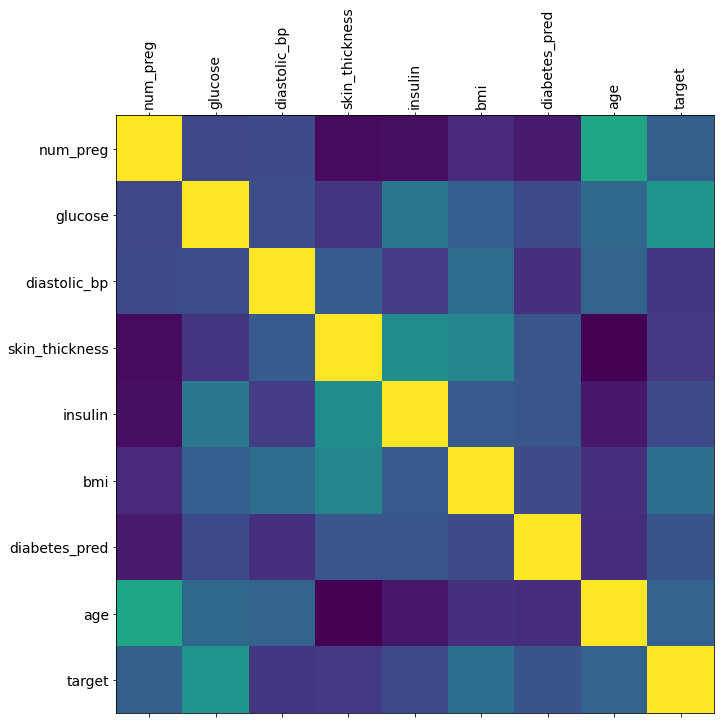

In [10]:
plot_fig(diabetes_df)

Warna kuning menandakan adanya korelasi antar fitur yang kuat. Berdasarkan plot di atas, tidak multicolinear pada atribut

## Mengecek tipe data
***
Pastikan semua tipe datanya adalah bertipe numerik

In [11]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   num_preg        768 non-null    int64  
 1   glucose         768 non-null    int64  
 2   diastolic_bp    768 non-null    int64  
 3   skin_thickness  768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   bmi             768 non-null    float64
 6   diabetes_pred   768 non-null    float64
 7   age             768 non-null    int64  
 8   target          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Data yang didapatkan sudah bernilai numerik. Ketika label kelas "target" tidak bernilai numerik, melainkan kategori (nominal), maka tipe datanya harus diubah dulu ke dalam numerik

## Cek distribusi label kelas

In [12]:
num_observation = len(diabetes_df)
num_true = len(
    diabetes_df[
        diabetes_df['target']==1
    ]
)
num_negatif = len(
    diabetes_df[
        diabetes_df['target']==0
    ]
)

In [13]:
print('Jumlah Terkena Diabetes = {0}, ({1:2.2f}%)'.format(num_true,((num_true)/num_observation)*100))
print('Jumlah Tidak Terkena Diabetes = {0}, ({1:2.2f}%)'.format(num_negatif,((num_negatif)/num_observation)*100))

Jumlah Terkena Diabetes = 268, (34.90%)
Jumlah Tidak Terkena Diabetes = 500, (65.10%)


# Model Training & Model Test

## Import scikit learn

In [14]:
from sklearn.model_selection import train_test_split

## Splitting Dataset menjadi Data Latih dan Data Uji

In [20]:
features_columns = diabetes_df.drop(columns=['target']).columns
target_column = ['target']

In [21]:
X = diabetes_df[features_columns]
y = diabetes_df[target_column]

In [22]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Sebelum training, pastikan data tidak mengandung missing values
***
Cek juga apakah data mengandung *unstandard missing values*

In [23]:
diabetes_df.head()

,num_preg,glucose,diastolic_bp,skin_thickness,insulin,bmi,diabetes_pred,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pada beberapa kolom ada yang mengandung nilai **0**. Patut dicurigai. Cek ada berapa jumlah 0 di masing-masing kolom

In [25]:
for col in features_columns:
    row_missing = len(
        diabetes_df[
            diabetes_df[col]==0
        ]
    )
    print("Row missing {0} = {1}".format(col,row_missing ))

Row missing num_preg = 111
Row missing glucose = 5
Row missing diastolic_bp = 35
Row missing skin_thickness = 227
Row missing insulin = 374
Row missing bmi = 11
Row missing diabetes_pred = 0
Row missing age = 0


karena cukup banyak yang mengandung nilai 0, maka penanganannya bisa mengimputasinya dengan nilai **median** atau **mean**.

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
fill_0 = SimpleImputer(missing_values=0,strategy='median')

In [28]:
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## Model Training

In [47]:
from sklearn.naive_bayes import GaussianNB
from numpy import ravel

In [48]:
nb_model = GaussianNB()

In [49]:
nb_model.fit(X_train,ravel(y_train))

GaussianNB()

## Model Testing (Menguji Akurasi)

In [53]:
from sklearn import metrics

### Performance pada *Training Data*

In [54]:
predicted_train = nb_model.predict(X_train)

In [55]:
print("Akurasi Train = {}".format(metrics.accuracy_score(y_train,predicted_train)))

Akurasi Train = 0.7541899441340782


### Performance pada Testing Data

In [56]:
predicted_test = nb_model.predict(X_test)
print("Akurasi Test = {}".format(metrics.accuracy_score(y_test,predicted_test)))

Akurasi Test = 0.7359307359307359


### Performansi model menggunakan Confusion Matrix

In [58]:
print("Confusion Matrix Result")
print(metrics.confusion_matrix(y_test,predicted_test))
print("="*100)
print(metrics.classification_report(y_test,predicted_test))

Confusion Matrix Result
[[118  33]
 [ 28  52]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



TN : 118 <br>
TP : 52 <br>
FN : 28 <br>
FP : 33 <br>

## Peningkatan performa model dengan Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfc = RandomForestClassifier(random_state=42, n_estimators=10)

In [61]:
rfc.fit(X_train, ravel(y_train))

RandomForestClassifier(n_estimators=10, random_state=42)

### Performance di data training

In [62]:
predicted_train_rfc = rfc.predict(X_train)

In [64]:
print("Akurasi Train = {}".format(metrics.accuracy_score(y_train,predicted_train_rfc)))

Akurasi Train = 0.9869646182495344


### Performance di data testing

In [66]:
predicted_test_rfc = rfc.predict(X_test)
print("Akurasi Train = {}".format(metrics.accuracy_score(y_test,predicted_test_rfc)))

Akurasi Train = 0.7402597402597403


In [67]:
print("Confusion Matrix Result")
print(metrics.confusion_matrix(y_test,predicted_test_rfc))
print("="*100)
print(metrics.classification_report(y_test,predicted_test_rfc))

Confusion Matrix Result
[[125  26]
 [ 34  46]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.57      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



Recall yang dihasilkan oleh RFC masih belum optimal dimana hasilnya menunjukkan 0,54

## Peningkatan performa model dengan Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr_model = LogisticRegression(C=0.7, random_state=42, solver='liblinear', max_iter=10000)

In [70]:
lr_model.fit(X_train, ravel(y_train))

LogisticRegression(C=0.7, max_iter=10000, random_state=42, solver='liblinear')

### Performance di data training

In [72]:
predicted_lr_model_train = lr_model.predict(X_train)
print("Akurasi Train = {}".format(metrics.accuracy_score(y_train,predicted_lr_model_train)))

Akurasi Train = 0.776536312849162


### Performance di data testing

In [74]:
predicted_lr_model_testing = lr_model.predict(X_test)
print("Akurasi Train = {}".format(metrics.accuracy_score(y_test,predicted_lr_model_testing)))

Akurasi Train = 0.7489177489177489


### Confusion Matrix Logistic Regression

In [75]:
print("Confusion Matrix Result")
print(metrics.confusion_matrix(y_test,predicted_test_rfc))
print("="*100)
print(metrics.classification_report(y_test,predicted_test_rfc))

Confusion Matrix Result
[[125  26]
 [ 34  46]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.57      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



Recall dan precision yang dihasilkan LR juga masih kecil 

## Analisis Data Kembali

Ketidakoptimalan model yang dihasilkan (Recall dan Precision yang rendah) mungkin saja diakibatkan oleh ketidakproporsionalan dari kelas target. Jumlah yang tidak terkena diabetes lebih banyak dibandingkan dengan jumlah yang terkena diabetes

### Tuning Hyperparameter pada LR
***
Lakukan tuning hyperparameter C_values pada LR dengan menggunakan X_train untuk mendapatkan nilai recall yang optimal dengan kelas target yang sudah balanced. Ada beberapa cara yang bisa digunakan untuk balancing value pada kelas target, salah satunya dengan random sampling. Bisa upsampling atau downsampling. <br>
Setelah mendapatkan hyperparameter yang optimal, lakukan pembentukan model LR ulang dengan menggunakan parameter optimal tadi. Lihat performansi model baru yang sudah terbentuk tadi pada data latih dan data uji

# Menyimpan model hasil training

In [77]:
import joblib

In [78]:
joblib.dump(nb_model,'./Model Train/NB_model.pkl')

['./Model Train/NB_model.pkl']

In [79]:
joblib.dump(lr_model,'./Model Train/NB_model.pkl')

['./Model Train/NB_model.pkl']

# Loading Model hasil training

In [80]:
nb_model_loaded = joblib.load('./Model Train/NB_model.pkl')

In [81]:
y_predicted = nb_model_loaded.predict(X_test)